# Convolutional Neural Network for MNIST Dataset Classification

## Basic Setup

In [2]:
import pandas as pd
import numpy as np

In [3]:
from tensorflow.keras.datasets import mnist
# (training_images, training_images_labels), (testing_images, testing_images_labels)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Visualizing the Image Data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# There are 60K images in the training dataset
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[0]

single_image

In [7]:
single_image.shape

(28, 28)

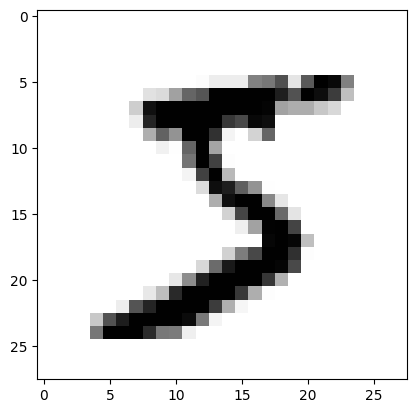

In [8]:
plt.imshow(single_image, cmap='binary')

## Preprocessing DATA

## Preprocessing the labels

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_train[0]

np.uint8(5)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [12]:
from tensorflow.keras.utils import to_categorical
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example[0]
# [0,1,2,3,4,5,6,7,8,9]
# [0,0,0,0,0,1,0,0,0,0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
y_cat_train= to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

## Preprocessing the input

In [17]:
print(single_image.max())
print(single_image.min())

255
0


In [18]:
x_train= x_train/255
x_test= x_test/255

In [20]:
scaled_single = x_train[0]

In [25]:
scaled_single.max()

np.float64(1.0)

In [26]:
scaled_single.min()

np.float64(0.0)

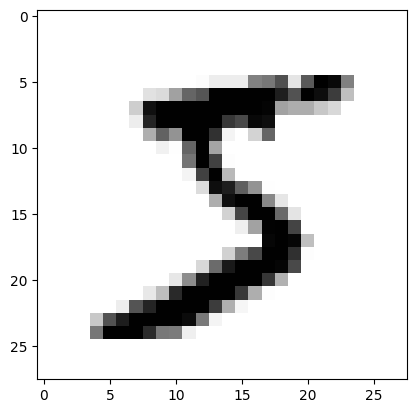

In [27]:
plt.imshow(scaled_single, cmap='binary')

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation.

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 values in a tuple.

In [28]:
#Reshape to include channel dimension(in this case, 1 channel)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [29]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Model Instantistion

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [31]:
help(Conv2D)

Help on class Conv2D in module keras.src.layers.convolutional.conv2d:

class Conv2D(keras.src.layers.convolutional.base_conv.BaseConv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), groups=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |
 |  2D convolution layer.
 |
 |  This layer creates a convolution kernel that is convolved with the layer
 |  input over a 2D spatial (or temporal) dimension (height and width) to
 |  produce a tensor of outputs. If `use_bias` is True, a bias vector is created
 |  and added to the outputs. Finally, if `activation` is not `None`, it is
 |  applied to the outputs as well.
 |
 |  Note on numerical precision: While in general Keras operation execution
 |  results are identical across backends up to 1e-7 precision in fl

In [32]:
model= Sequential()

#CONVOLUTIONAL LAYER
model.add(Conv2D(filters=16, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN Images from 28 by 28 to 784 before Final Layer
model.add(Flatten())

# 128 NEURONS in DENSE HIDDEN LAYER (arbitrary no. of neurons Can be changed)
model.add(Dense(128, activation='relu'))

#LAST LAYER is the Classifier, Thus 10 Possible Classes
model.add(Dense(10,activation='softmax'))

#https://keras.io/metrics/
model.compile(loss= 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy']) # we can add in additional metrics

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 16)     │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 296,602 (1.13 MB)

 Trainable params: 296,602 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [35]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9054 - loss: 0.3139 - val_accuracy: 0.9749 - val_loss: 0.0759
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9822 - loss: 0.0592 - val_accuracy: 0.9851 - val_loss: 0.0479
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9890 - loss: 0.0359 - val_accuracy: 0.9862 - val_loss: 0.0393
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9860 - val_loss: 0.0408
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9948 - loss: 0.0166 - val_accuracy: 0.9874 - val_loss: 0.0372
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9957 - loss: 0.0122 - val_accuracy: 0.9872 - val_loss: 0.0436
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9964 - loss: 0.0111 - val_accuracy: 0.9857 - val_loss: 0.0464


In [36]:
losses= pd.DataFrame(model.history.history)

## Model Predictions

In [38]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [39]:
y_cat_test.shape

(10000, 10)

In [40]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [41]:
predictions[0]

np.int64(7)

In [42]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Model Evaluation

In [43]:
model.metrics_names

['loss', 'compile_metrics']

In [44]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.951417,0.162653,0.9749,0.075853
1,0.982750,0.057356,0.9851,0.047878
2,0.988500,0.037396,0.9862,0.039301
3,0.991033,0.027789,0.9860,0.040815
4,0.994017,0.019228,0.9874,0.037242


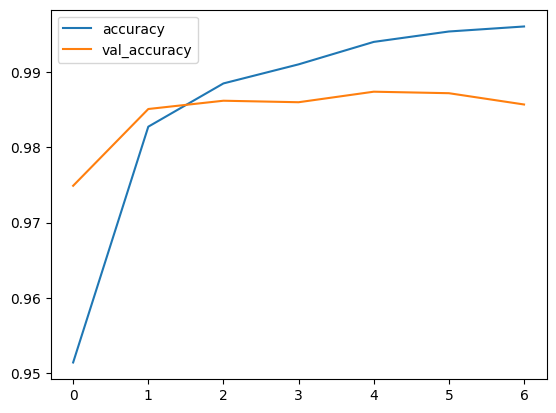

In [45]:
losses[['accuracy', 'val_accuracy']].plot();

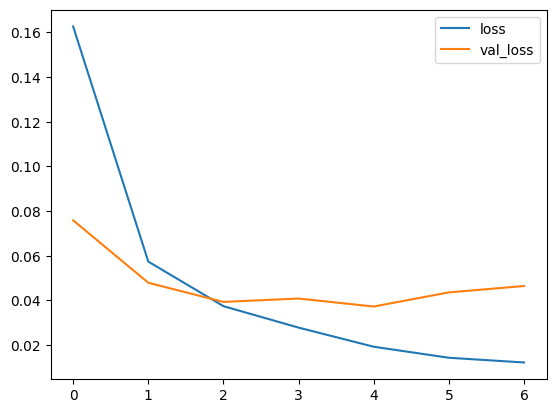

In [46]:
losses[['loss','val_loss']].plot();

In [47]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test, verbose=0))

['loss', 'compile_metrics']
[0.04642297700047493, 0.9857000112533569]


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 973    1    0    0    0    0    3    1    2    0]
 [   0 1131    0    1    0    0    1    1    1    0]
 [   1    4 1009    0    1    0    1    7    8    1]
 [   3    1    2  985    0    7    0    1   10    1]
 [   0    0    1    0  966   

<Axes: >

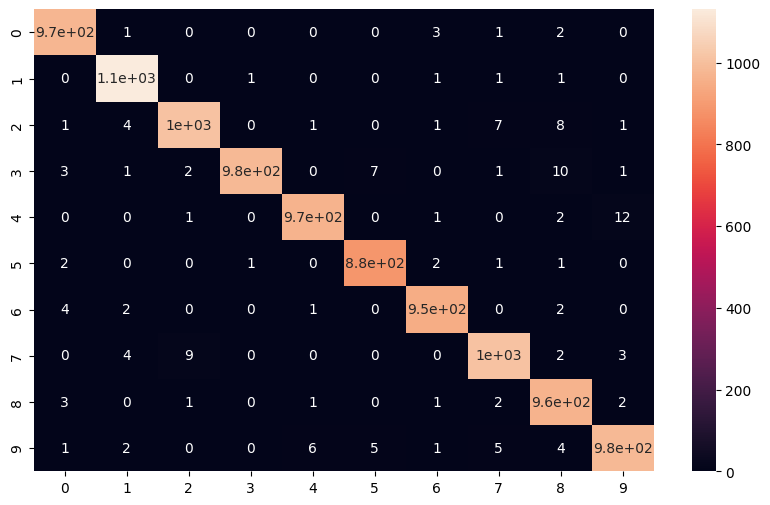

In [51]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

# Predicting on one DATA Point

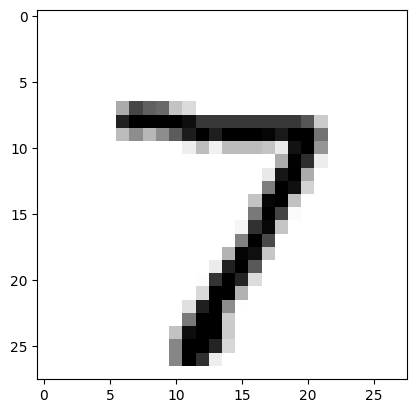

In [52]:
my_number = x_test[0] # (28,28,1)
plt.imshow(my_number.reshape(28,28), cmap='binary');

In [53]:
# SHAPE --> (num_images, width,height,color_channels)
my_prediction= model.predict(my_number.reshape(1,28,28,1))
my_prediction = np.argmax(my_prediction, axis=-1)
print(my_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[7]
